## 1. Get Dow Jones Industrial Average data from yahoo. I get the data from Yahoo and store them into a CSV file. Then upload this file into GitHub and use Pandas to get them.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
from keras.layers import Input, Dense, LSTM
from keras.models import Model

Using TensorFlow backend.


In [2]:
df = pd.read_html('https://raw.githubusercontent.com/NewThread-ZY/Numerical-Methods/main/New%20folder/%5EDJI%2034%2C021.45%20433.79%201.29%25%20_%20Dow%2030%20-%20Yahoo%20Finance.html')

## 2. data clean

In [3]:
df = df[0]

In [4]:
df1 = df[:-1]
df1

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 12, 2021",34206.40,34207.87,33555.22,33587.66,33587.66,381350000
1,"May 11, 2021",34572.74,34572.74,34075.31,34269.16,34269.16,413180000
2,"May 10, 2021",34785.27,35091.56,34741.57,34742.82,34742.82,361620000
3,"May 07, 2021",34578.27,34811.39,34464.31,34777.76,34777.76,303400000
4,"May 06, 2021",34245.11,34561.29,34185.06,34548.53,34548.53,315430000
5,"May 05, 2021",34163.99,34331.20,34039.66,34230.34,34230.34,253180000
6,"May 04, 2021",34080.20,34147.78,33765.68,34133.03,34133.03,407860000
7,"May 03, 2021",33904.89,34221.06,33904.89,34113.23,34113.23,289770000
8,"Apr 30, 2021",33988.75,33988.75,33784.96,33874.85,33874.85,374890000
9,"Apr 29, 2021",33855.64,34087.21,33744.28,34060.36,34060.36,408450000


In [5]:
df1 = df1[['Open','High','Low','Close*']]

In [6]:
df1 = df1.astype("float")
df1 = df1.iloc[::-1]


In [7]:
df1 = df1.reset_index(drop=True)
df1

,Open,High,Low,Close*
0,3152.10,3172.63,3139.31,3172.40
1,3172.40,3210.64,3165.92,3201.50
2,3201.50,3213.33,3191.86,3200.10
3,3200.10,3210.20,3184.48,3204.80
4,3204.80,3229.20,3185.82,3203.90
5,3203.90,3228.31,3192.75,3209.50
6,3209.50,3217.13,3185.38,3199.50
7,3199.50,3201.25,3179.11,3185.60
8,3185.60,3248.88,3182.92,3246.20
9,3246.20,3263.42,3232.11,3258.50


## 3.Use Close data to predict.

In [8]:
data_train = df1.iloc[:int(df1.shape[0] * 0.8), :]
data_test = df1.iloc[int(df1.shape[0] * 0.8):, :]
print(data_train.shape, data_test.shape)

(5916, 4) (1480, 4)


In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

## 4.create model

## 4.1 keras

(5911, 5, 1) (5911,) (1475, 5, 1) (1475,)
Epoch 1/10
5911/5911 [==============================] - 3s 500us/step - loss: 0.6173
Epoch 2/10
5911/5911 [==============================] - 2s 262us/step - loss: 0.5026
Epoch 3/10
5911/5911 [==============================] - 2s 271us/step - loss: 0.2471
Epoch 4/10
5911/5911 [==============================] - 2s 255us/step - loss: 0.1917
Epoch 5/10
5911/5911 [==============================] - 2s 290us/step - loss: 0.1889
Epoch 6/10
5911/5911 [==============================] - 2s 304us/step - loss: 0.1864
Epoch 7/10
5911/5911 [==============================] - 2s 293us/step - loss: 0.1856
Epoch 8/10
5911/5911 [==============================] - 2s 289us/step - loss: 0.1857
Epoch 9/10
5911/5911 [==============================] - 1s 140us/step - loss: 0.1854
Epoch 10/10
5911/5911 [==============================] - 0s 75us/step
MSE Train: 0.18515098276517364
1475/1475 [==============================] - 0s 44us/step
MSE Test: 0.8267056680533845


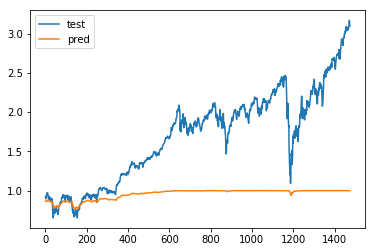

In [10]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model

output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128

X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X = Input(shape=[X_train.shape[1], X_train.shape[2],])
h = LSTM(hidden_size, activation='relu')(X)
Y = Dense(output_dim, activation='sigmoid')(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

## 4.2 Tensorflow

MSE Train: 0.1149236
MSE Test: 2.5419862


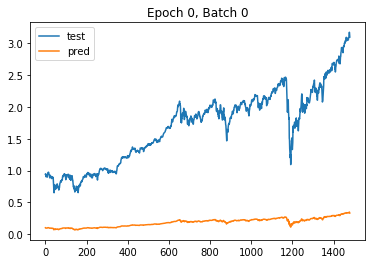

MSE Train: 0.0009320032
MSE Test: 0.016512401


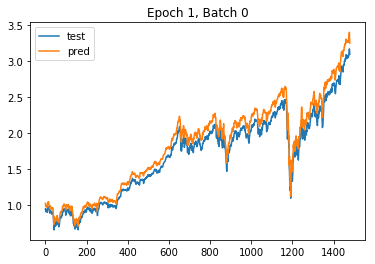

MSE Train: 0.00021363652
MSE Test: 0.003382252


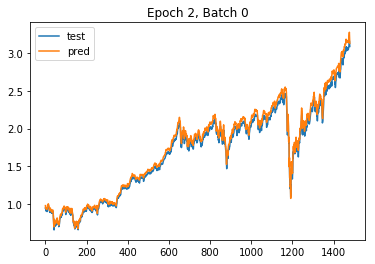

MSE Train: 0.00010309611
MSE Test: 0.00051363645


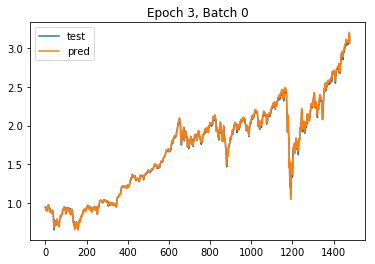

MSE Train: 9.59186e-05
MSE Test: 0.0005536358


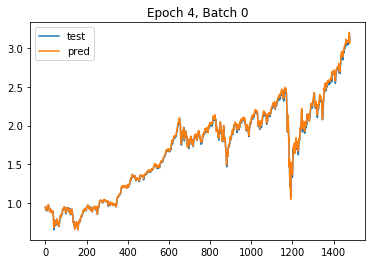

MSE Train: 9.038041e-05
MSE Test: 0.00038402766


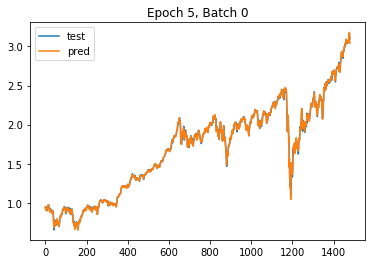

MSE Train: 8.4509884e-05
MSE Test: 0.00043608472


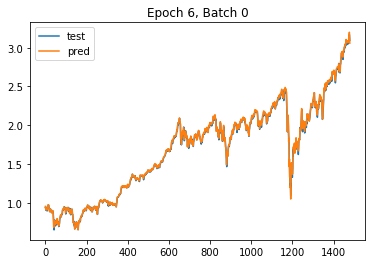

MSE Train: 7.824761e-05
MSE Test: 0.0005940466


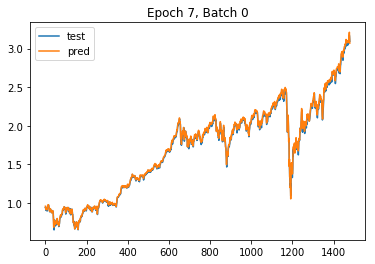

MSE Train: 7.415033e-05
MSE Test: 0.0003408188


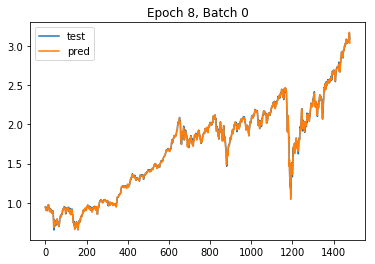

MSE Train: 6.181951e-05
MSE Test: 0.00031582254


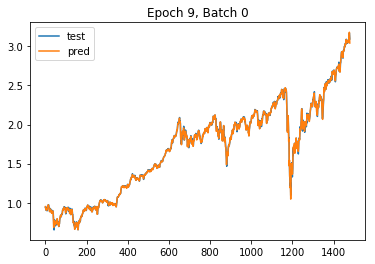

In [11]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

input_dim = X_train.shape[1]
hidden_1 = 1024
hidden_2 = 512
hidden_3 = 256
hidden_4 = 128
output_dim = 1
batch_size = 256
epochs = 10

tf.reset_default_graph()

X = tf.placeholder(shape=[None, input_dim], dtype=tf.float32)
Y = tf.placeholder(shape=[None], dtype=tf.float32)

W1 = tf.get_variable('W1', [input_dim, hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable('b1', [hidden_1], initializer=tf.zeros_initializer())
W2 = tf.get_variable('W2', [hidden_1, hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable('b2', [hidden_2], initializer=tf.zeros_initializer())
W3 = tf.get_variable('W3', [hidden_2, hidden_3], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable('b3', [hidden_3], initializer=tf.zeros_initializer())
W4 = tf.get_variable('W4', [hidden_3, hidden_4], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b4 = tf.get_variable('b4', [hidden_4], initializer=tf.zeros_initializer())
W5 = tf.get_variable('W5', [hidden_4, output_dim], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b5 = tf.get_variable('b5', [output_dim], initializer=tf.zeros_initializer())

h1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
h2 = tf.nn.relu(tf.add(tf.matmul(h1, W2), b2))
h3 = tf.nn.relu(tf.add(tf.matmul(h2, W3), b3))
h4 = tf.nn.relu(tf.add(tf.matmul(h3, W4), b4))
out = tf.transpose(tf.add(tf.matmul(h4, W5), b5))

cost = tf.reduce_mean(tf.squared_difference(out, Y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        shuffle_indices = np.random.permutation(np.arange(y_train.shape[0]))
        X_train = X_train[shuffle_indices]
        y_train = y_train[shuffle_indices]

        for i in range(y_train.shape[0] // batch_size):
            start = i * batch_size
            batch_x = X_train[start : start + batch_size]
            batch_y = y_train[start : start + batch_size]
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})

            if i % 50 == 0:
                print('MSE Train:', sess.run(cost, feed_dict={X: X_train, Y: y_train}))
                print('MSE Test:', sess.run(cost, feed_dict={X: X_test, Y: y_test}))
                y_pred = sess.run(out, feed_dict={X: X_test})
                y_pred = np.squeeze(y_pred)
                plt.plot(y_test, label='test')
                plt.plot(y_pred, label='pred')
                plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
                plt.legend()
                plt.show()